In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, irfft
import scipy.signal as sig
from scipy.io import wavfile
%matplotlib inline

In [3]:
# Function for cleaning signals, didn't think we would want to keep doing the same code over and over

def cleaning(samplerate,data,freqCutoff):
    N = data.shape[0]
    length = N / samplerate
    T0 = length
    dt = T0/N
    time = np.linspace(0., length, data.shape[0])
    
    Vdusty = (2/N)*fft(data[:, 1])
    freq = fftfreq(N,dt)
    
    VCleanf = Vdusty.copy()

    for i in range(len(freq)):
        if abs(freq[i]) > freqCutoff:
            VCleanf[i] = 0       

    VClean = ifft(N*VCleanf)
    VC = np.real(VClean)
    return time,VClean,freq,Vdusty

In [4]:
samplerate, data = wavfile.read('songs/holy-wars-intro.wav')

<ipython-input-4-b9064f7ddc31>:1: WavFileWarning: Reached EOF prematurely; finished at 16772276 bytes, expected 16772284 bytes from header.
  samplerate, data = wavfile.read('songs/holy-wars-intro.wav')


In [5]:
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

number of channels = 2
length = 87.355375s


C:\Users\adama\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


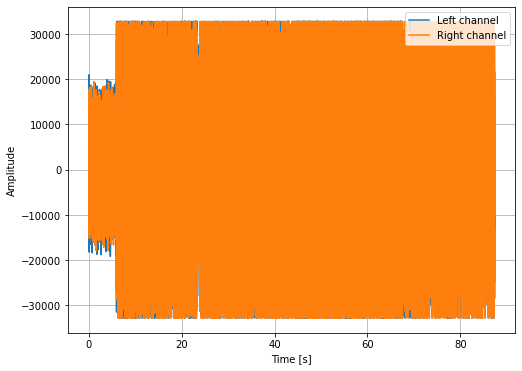

In [6]:
N = data.shape[0]
T0 = length
dt = T0/N
time = np.linspace(0., length, data.shape[0])

fig = plt.figure(figsize=(8,6))
plt.plot(time, data[:, 0], label="Left channel")

plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

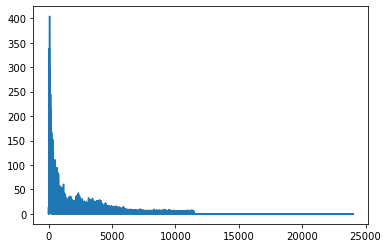

In [7]:
Vdusty = (2/N)*fft(data[:, 1])
freq = fftfreq(N,dt)
plt.plot(freq[0:N//2], abs(Vdusty[0:N//2]))

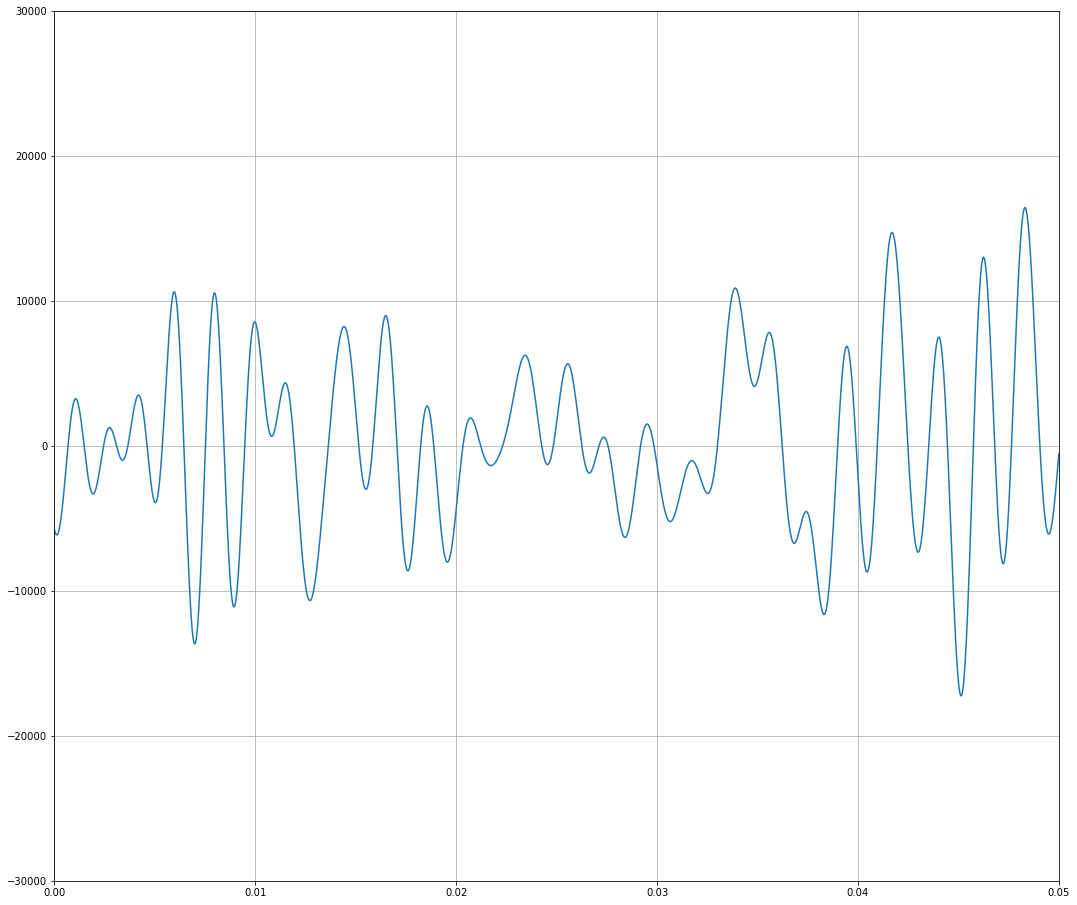

In [8]:
VCleanf = Vdusty.copy()

for i in range(len(freq)):
    if abs(freq[i]) > 600:
        VCleanf[i] = 0

VClean = ifft(N*VCleanf)
VC = np.real(VClean)
plt.figure(figsize=(18,16))
plt.plot(time,(VC))
plt.axis([0,0.05,-30000,30000])
plt.grid()

C:\Users\adama\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(10.0, 10.02, -400.0, 400.0)

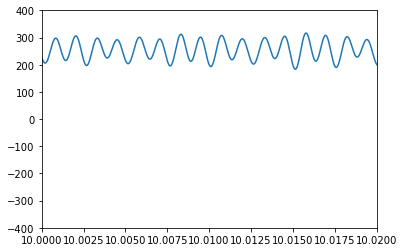

In [59]:
cAngel = cleaning(samplerate2,data2,1000)
plt.plot(cAngel[0],cAngel[1])
plt.axis([10,10.02,-400,400])

<ipython-input-52-0950080abd7f>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read('songs/peace-sells-intro.wav')


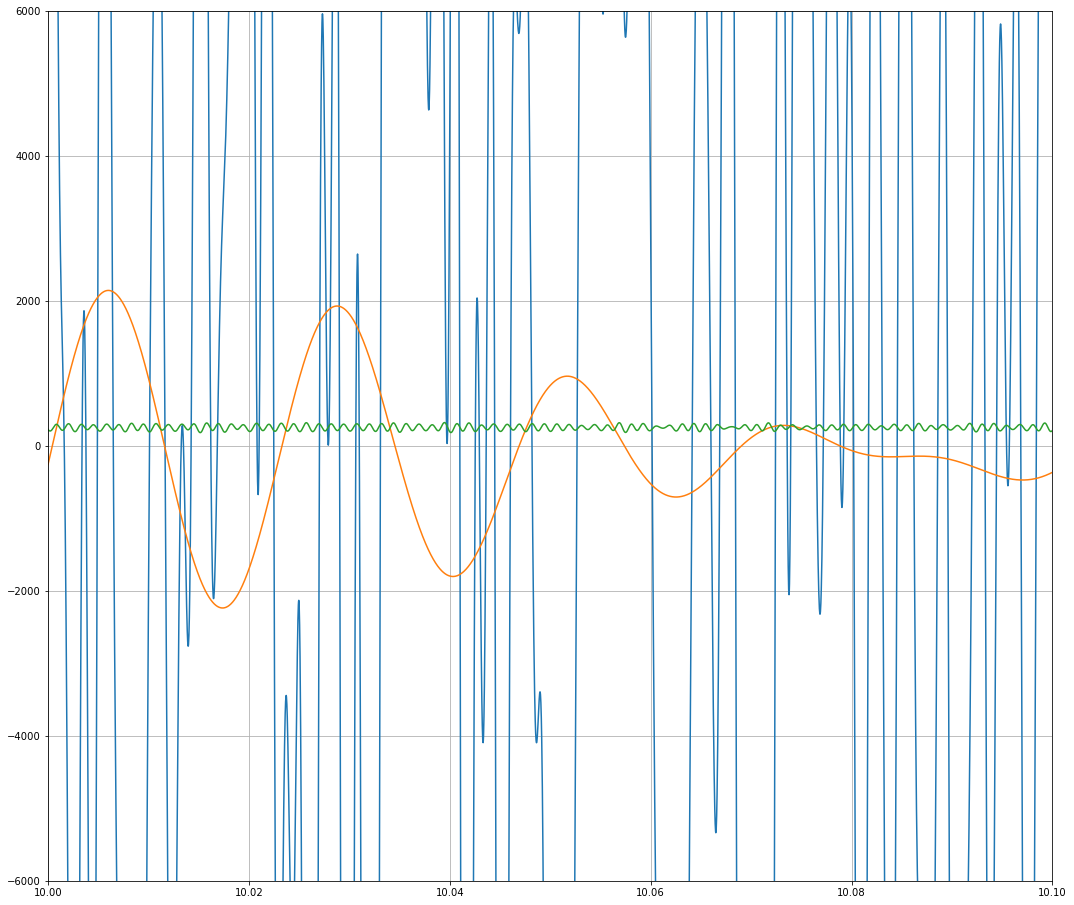

In [52]:
# Overlaying signals from the intro for Peace Sells and Holy Wars

samplerate1, data1 = wavfile.read('songs/peace-sells-intro.wav')
samplerate2, data2 = wavfile.read('songs/greatest-song-ever-intro.wav')
pSells = cleaning(samplerate1,data1,50)
cAngel = cleaning(samplerate2,data2,1000)

pfreq = pSells[2]
pVClean = pSells[1]
ptime = pSells[0]

angelfreq = cAngel[2]
angelVClean = cAngel[1]
angeltime = cAngel[0]

plt.figure(figsize=(18,16))
plt.plot(time,VC)
plt.plot(ptime,np.real(pVClean))
plt.plot(angeltime,np.real(angelVClean))
plt.axis([10,10.1,-6000,6000])
plt.grid()

(0.0, 100.0, 0.0, 400.0)

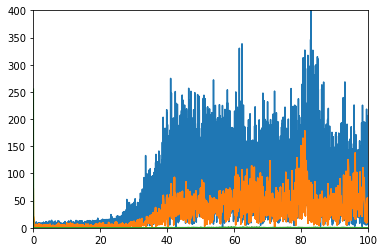

In [60]:
Vdusty = (2/N)*fft(data[:, 1])
freq = fftfreq(N,dt)
plt.plot(freq[0:N//2], abs(Vdusty[0:N//2]))
plt.plot(abs(pfreq[0:N//2]), abs(pSells[3][0:N//2]))
plt.plot(abs(angelfreq[0:N//2]), abs(cAngel[3][0:N//2]))
plt.axis([0,100,0,400])

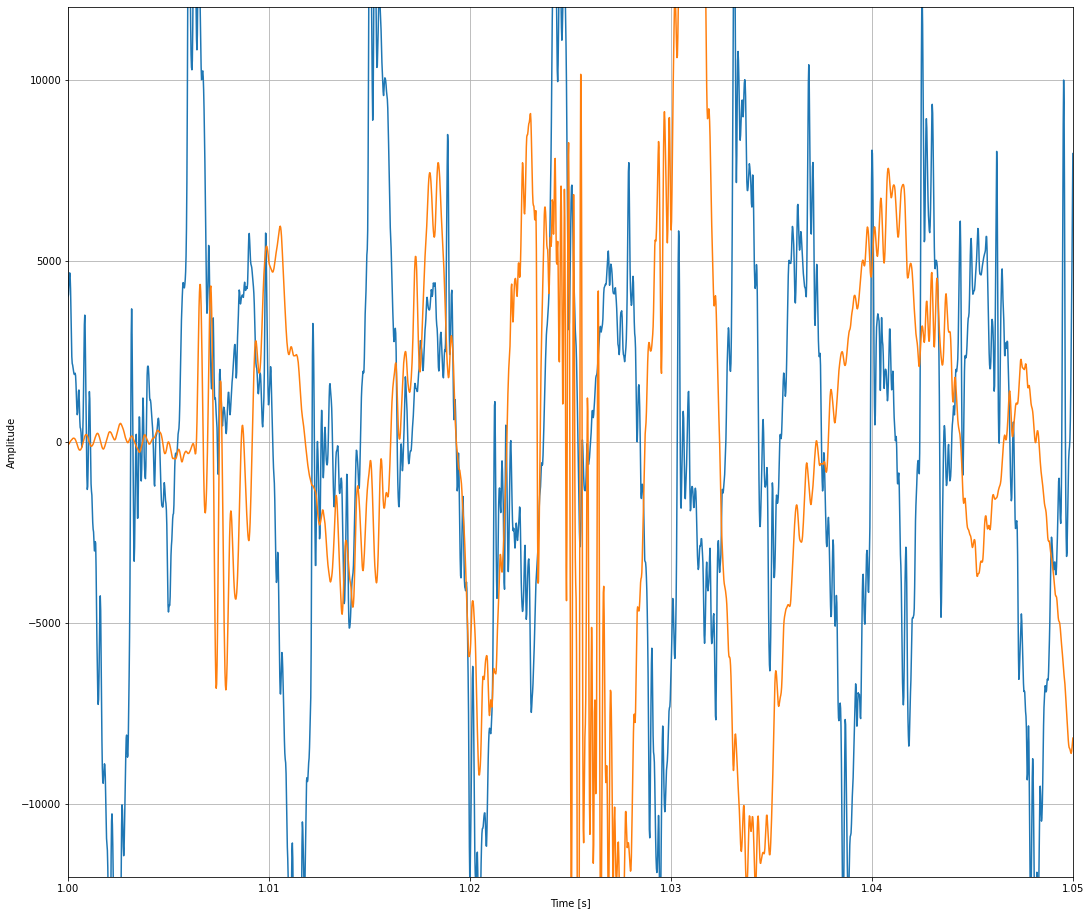

In [11]:
# Same thing as above but with dusty signals

fig = plt.figure(figsize=(18,16))

plt.plot(time, data[:, 0])
plt.plot(ptime, data1[:, 0])

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.axis([1,1.05,-12000,12000])
plt.grid()

Correlation between signals

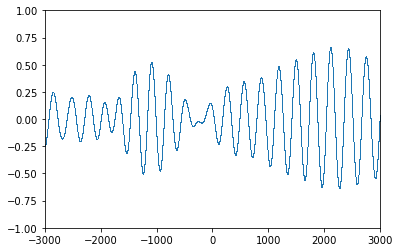

In [29]:
from scipy import signal
sig1 = np.real(pVClean)
sig2 = VC
corr1 = signal.correlate(sig1, sig2, method='fft')
corr1 /= np.max(corr1)
lags = np.linspace(-len(sig1), len(sig1), len(corr1))
plt.axis([-3000,3000,-1,1])
plt.plot(lags,corr1,marker=',', linestyle="")

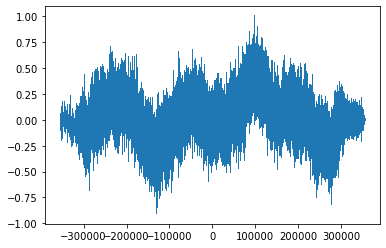

In [78]:
sig1 = np.real(angelVClean)
sig2 = VC
corr1 = signal.correlate(sig1, sig2, method='fft')
corr1/= np.max(corr1)
lags = np.linspace(-len(sig1), len(sig1), len(corr1))
plt.plot(lags,corr1,marker=',', linestyle="")

In [75]:
len(np.where(corr1>=max(corr1))[0])

1

Convolution Integral

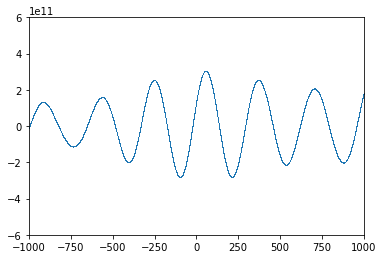

In [33]:
autocorr = signal.fftconvolve(sig1, sig2,mode="full")
lags = np.linspace(-len(sig1), len(sig1), len(corr1))
plt.axis([-1000,1000,-6e11,6e11])
plt.plot(lags,autocorr,marker=',', linestyle="")

In [35]:
np.where(autocorr==min(autocorr))

(array([2246580], dtype=int64),)